# Uncertainty Analysis
___

In [80]:
clustering_strategy = 'BGMM'

## Setup

### Importing Packages

In [81]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.float_format", "{:.2e}".format)

### Directories

In [82]:
# Data Root Directory
data_root_dir = os.path.join(os.getcwd(), 'Data')

# Test Subset Directory
test_subset_dir = os.path.join(data_root_dir, f'{clustering_strategy}_test_subset.parquet')

# Plot Directory
plot_dir = os.path.join(data_root_dir, 'Analysis_Plots')

In [83]:
data = pd.read_parquet(test_subset_dir) # Cluster, Prob_0 - Prob_19, Feature: 0 - Feature: 511, Volunteer Labels, Type
print(data.shape)

(13686, 667)


In [84]:
columns = [col for col in data.columns if 'manual' in col]
for col in columns:
    print(col)

disk-edge-on_manual-total
disk-edge-on_yes_manual-fraction
disk-edge-on_no_manual-fraction
merging_manual-total
merging_merger_manual-fraction
merging_tidal-debris_manual-fraction
merging_both_manual-fraction
merging_neither_manual-fraction
smooth-or-featured_manual-total
smooth-or-featured_smooth_manual-fraction
smooth-or-featured_featured-or-disk_manual-fraction
smooth-or-featured_artifact_manual-fraction
how-rounded_manual-total
how-rounded_completely_manual-fraction
how-rounded_in-between_manual-fraction
how-rounded_cigar-shaped_manual-fraction
has-spiral-arms_manual-total
has-spiral-arms_yes_manual-fraction
has-spiral-arms_no_manual-fraction


## Plotting

In [95]:
cluster = 9
type = 'E'

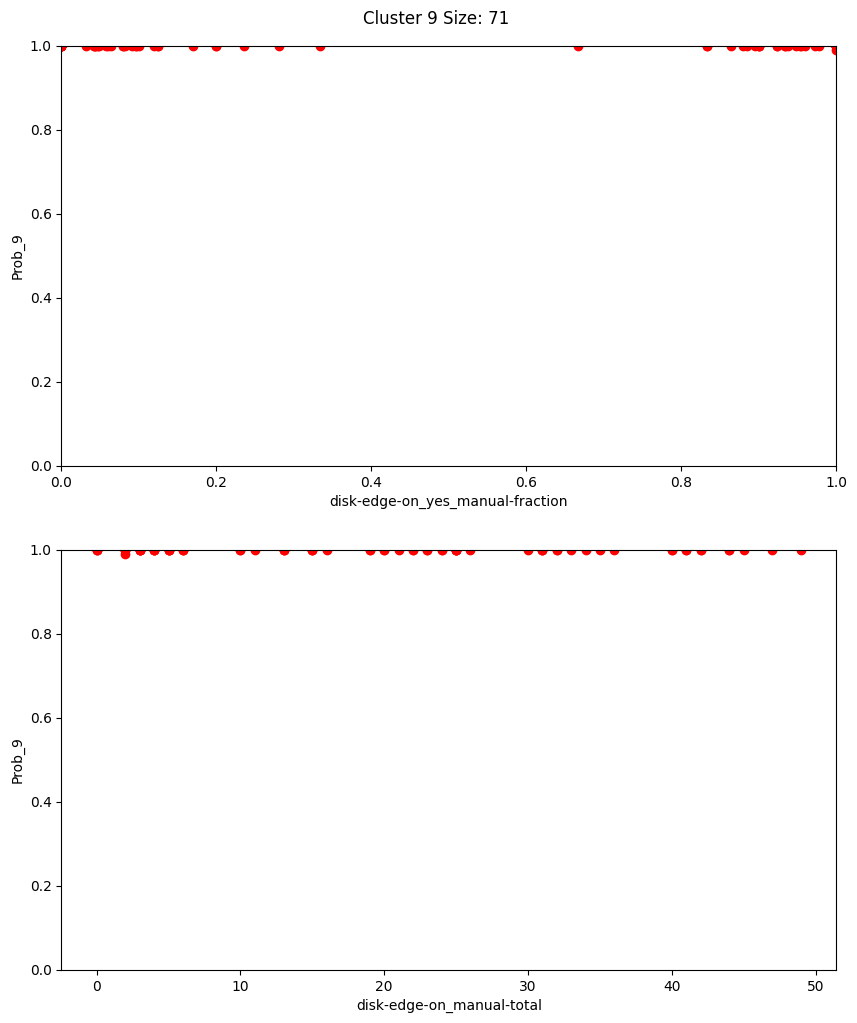

In [96]:
cluster_subset = data[data['Cluster'] == cluster]
cluster_size = cluster_subset.shape[0]

fig, ax = plt.subplots(2,1, figsize=(10,12))

if type == 'R':
    # Round Ellipticals
    ax[0].scatter(cluster_subset['smooth-or-featured_smooth_manual-fraction'], cluster_subset[f'Prob_{cluster}'], color='red')
    ax[0].set_xlabel('smooth-or-featured_smooth_manual-fraction')
    ax[1].scatter(cluster_subset['smooth-or-featured_manual-total'], cluster_subset[f'Prob_{cluster}'], color='red')
    ax[1].set_xlabel('smooth-or-featured_manual-total')
elif type == 'S':
    # Spirals
    ax[0].scatter(cluster_subset['has-spiral-arms_yes_manual-fraction'], cluster_subset[f'Prob_{cluster}'], color='red')
    ax[0].set_xlabel('has-spiral-arms_yes_manual-fraction')
    ax[1].scatter(cluster_subset['has-spiral-arms_manual-total'], cluster_subset[f'Prob_{cluster}'], color='red')
    ax[1].set_xlabel('has-spiral-arms_manual-total')
elif type == 'E':
    # Edge-on
    ax[0].scatter(cluster_subset['disk-edge-on_yes_manual-fraction'], cluster_subset[f'Prob_{cluster}'], color='red')
    ax[0].set_xlabel('disk-edge-on_yes_manual-fraction')
    ax[1].scatter(cluster_subset['disk-edge-on_manual-total'], cluster_subset[f'Prob_{cluster}'], color='red')
    ax[1].set_xlabel('disk-edge-on_manual-total')

ax[0].set_ylabel(f'Prob_{cluster}')
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[1].set_ylabel(f'Prob_{cluster}')
ax[1].set_ylim(0,1)

plt.suptitle(f'Cluster {cluster} Size: {cluster_size}', y=0.91)
plt.savefig(f'{plot_dir}/{clustering_strategy}_cluster_{cluster}.png')
plt.show()